In [1]:
from dd_class import Elevage
from dd_class import Dragodinde
import random
import time 

class Random_crossing :
    def __init__(self) :
        self.elevage = self.create_elevage()

    def __str__(self) :
        return (f"{self.elevage}")
    
    def get_length_elevage(self) :
        return len(self.elevage.get_dragodindes())
    
    def get_better_generation(self) :
        better_generation = 1
        for dragodinde in self.elevage.get_dragodindes() :
            generation = dragodinde.get_generation()
            if generation > better_generation :
                better_generation = generation
        
        return better_generation

    def get_dd_better_generation(self, dragodindes) :
        better_generation = 1
        index_best_dd = 0
        for idx, dragodinde in enumerate(dragodindes) :
            generation  = dragodinde.get_generation()
            if generation > better_generation :
                better_generation = generation
                index_best_dd = idx
        return dragodindes[index_best_dd]

    def create_elevage(self):

        dragodindes_data = [
            (1, "M", "Rousse", 1),
            (2, "F", "Rousse", 1),
            (3, "M", "Amande", 1),
            (4, "F", "Amande", 1),
            (5, "M", "Dorée", 1),
            (6, "F", "Dorée", 1)
        ]

        list_dd = []
        for id, gender, color, generation in dragodindes_data:
            dragodinde = Dragodinde(id, gender, color, generation)
            list_dd.append(dragodinde)

        return Elevage(list_dd)
    
    def random_crosing_better_gen(self):
        males = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "M"]
        females = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "F"]

        if not males or not females:
            raise ValueError("No suitable pairs for crossing.")

        # Take the best generation
        male = self.get_dd_better_generation(males)
        female = self.get_dd_better_generation(females)

        if male.get_generation() != female.get_generation():
            male = random.choice(males)
            female = random.choice(females)
        
        while male.get_couleur() == female.get_couleur() :
            male = random.choice(males)
            female = random.choice(females)

        # Assuming accouplement_naissance is a method that performs crossing and returns probabilities
        nouvelle_dd, _ = self.elevage.accouplement_naissance(male, female)

        return nouvelle_dd.get_generation()

    def random_crosing(self):
        males = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "M"]
        females = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "F"]

        if not males or not females:
            raise ValueError("No suitable pairs for crossing.")

        male = random.choice(males)
        female = random.choice(females)

        # Assuming accouplement_naissance is a method that performs crossing and returns probabilities
        nouvelle_dd, _ = self.elevage.accouplement_naissance(male, female)

        return nouvelle_dd.get_generation()

In [12]:
    
start_time = time.time()
elevage = Random_crossing()
list_gen_random = [1]
better_generation = 1
crosing_number = 1000
for i in range(crosing_number) :
    generation = elevage.random_crosing()
    if generation > better_generation :
        better_generation = generation
    list_gen_random.append(better_generation)

end_time = time.time()
print(f"-------------- Random crossing --------------")
print(f"Length of the evelage : {elevage.get_length_elevage()}")
print(f"Better generation so far : {better_generation}")
print(f"Time taken to compute {crosing_number} crossing : {end_time - start_time:.6f} seconds")


-------------- Random crossing --------------
Length of the evelage : 1006
Better generation so far : 3
Time taken to compute 1000 crossing : 2.592970 seconds


In [13]:

start_time = time.time()
elevage = Random_crossing()
list_gen_upgrade_random = [1]
better_generation = 1
crosing_number = 1000
for i in range(crosing_number) :
    generation = elevage.random_crosing_better_gen()
    if generation > better_generation :
        better_generation = generation
    list_gen_upgrade_random.append(better_generation)


end_time = time.time()
print(f"----------- Random crossing upgrade -----------")
print(f"Length of the evelage : {elevage.get_length_elevage()}")
print(f"Better generation so far : {better_generation}")
print(f"Time taken to compute {crosing_number} crossing : {end_time - start_time:.6f} seconds")


----------- Random crossing upgrade -----------
Length of the evelage : 1004
Better generation so far : 4
Time taken to compute 1000 crossing : 4.175497 seconds


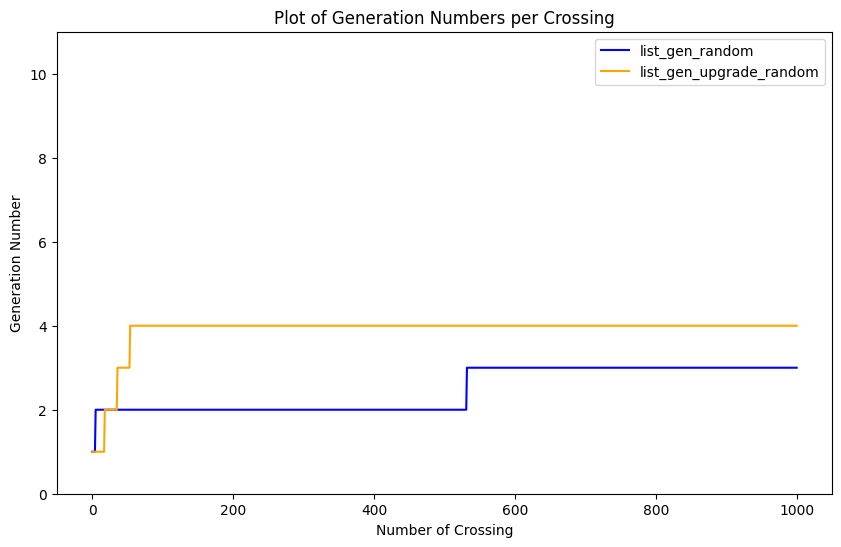

In [14]:
import matplotlib.pyplot as plt

# x values representing the number of crossings (index of the list)
x_values = list(range(len(list_gen_upgrade_random)))

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting the two lists
plt.plot(x_values, list_gen_random, label='list_gen_random', color='blue')
plt.plot(x_values, list_gen_upgrade_random, label='list_gen_upgrade_random', color='orange')

# Set y-axis limits between 0 and 11
plt.ylim(0, 11)

# Adding labels and title
plt.xlabel('Number of Crossing')
plt.ylabel('Generation Number')
plt.title('Plot of Generation Numbers per Crossing')
plt.legend()

# Show the plot
plt.grid(False)
plt.show()